In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
os.chdir('..')

In [13]:
import concurrent.futures
import random
import stock_analisys.packages.paths as paths
import pandas as pd
import time
import stock_analisys.packages.fundamentei_class as fc
import stock_analisys.packages.plots_fundamentei as plot

## Grabing Table from Ticker

In [ ]:
import stock_analisys.packages.fundamentei_class as fc

evaluate_test = fc.FundamenteiEvaluate("a")
evaluate_test.table_extract()
display(evaluate_test.company_full_data)

# Plot Config 

Company: 


 aapl


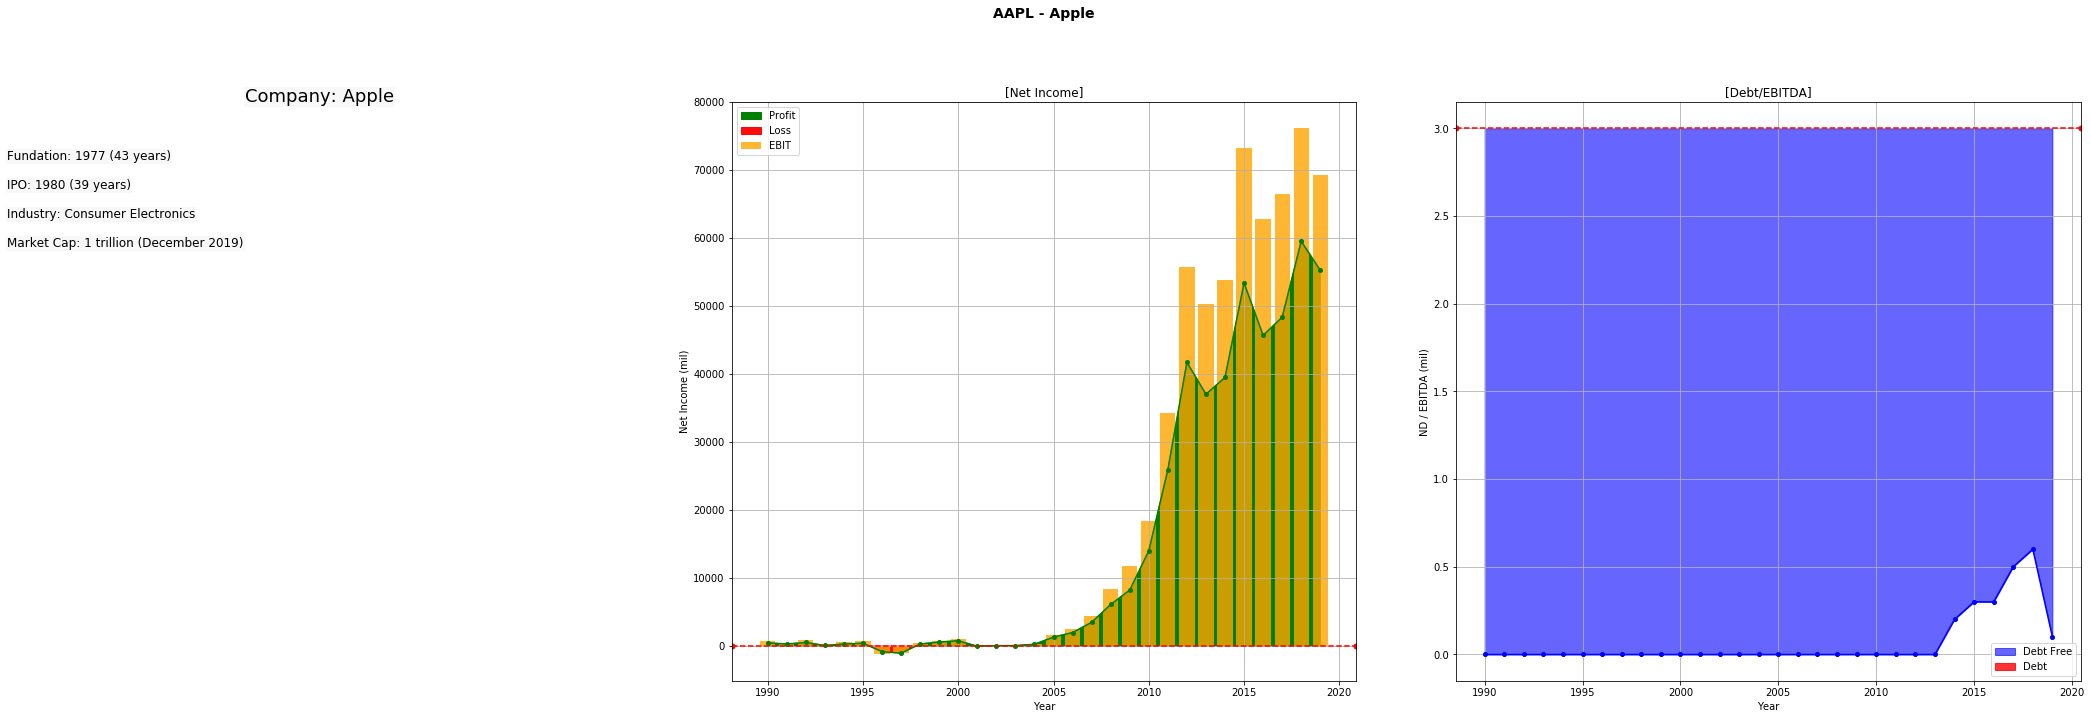

Apple designs a wide variety of consumer electronic devices, including smartphones (iPhone), tablets (iPad), PCs (Mac), smartwatches (Watch), and TV boxes (Apple TV), among others.


In [14]:
plot.main()